<a href="https://colab.research.google.com/github/JoelAbadi/DI-Bootcamp/blob/main/W3_D4_Daily_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Inspect the data, and attached the ZIP file

In [11]:
from google.colab import files
uploaded = files.upload()


Saving archive.zip to archive (1).zip


In [12]:
import os

# Show the exact uploaded file name
uploaded_files = list(uploaded.keys())
print("Uploaded ZIP file:", uploaded_files[0])


Uploaded ZIP file: archive (1).zip


Step 2: Extract the ZIP

In [16]:
import zipfile

zip_path = 'archive.zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()
    print("✅ Extracted files:", zip_ref.namelist())


✅ Extracted files: ['2015.csv', '2016.csv', '2017.csv', '2018.csv', '2019.csv']


Step 3: Load the CSV

In [20]:
import pandas as pd

# Load only the 2019 data
df_2019 = pd.read_csv('2019.csv')
df_2019.head()


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [21]:
# See structure and columns
df_2019.info()
df_2019.describe()
df_2019.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

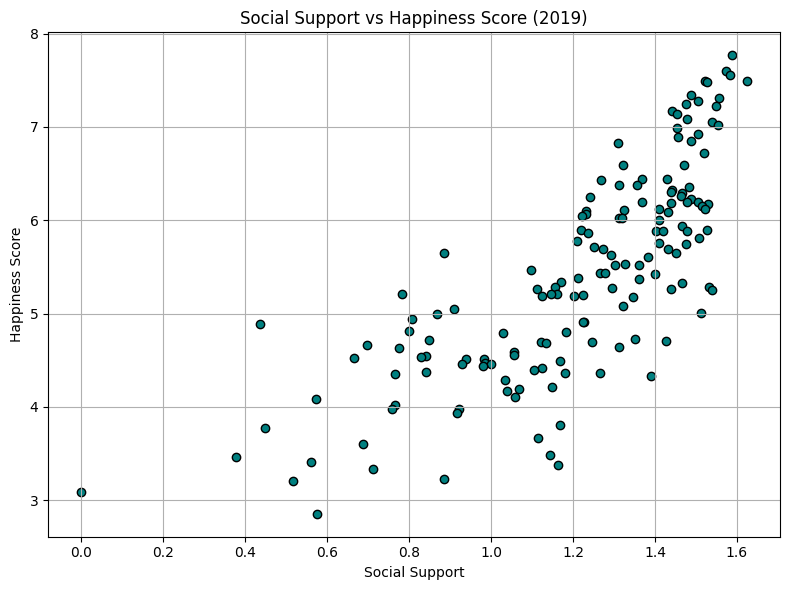

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_2019['Social support'], df_2019['Score'], color='teal', edgecolors='black')
plt.title('Social Support vs Happiness Score (2019)')
plt.xlabel('Social Support')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.tight_layout()
plt.show()


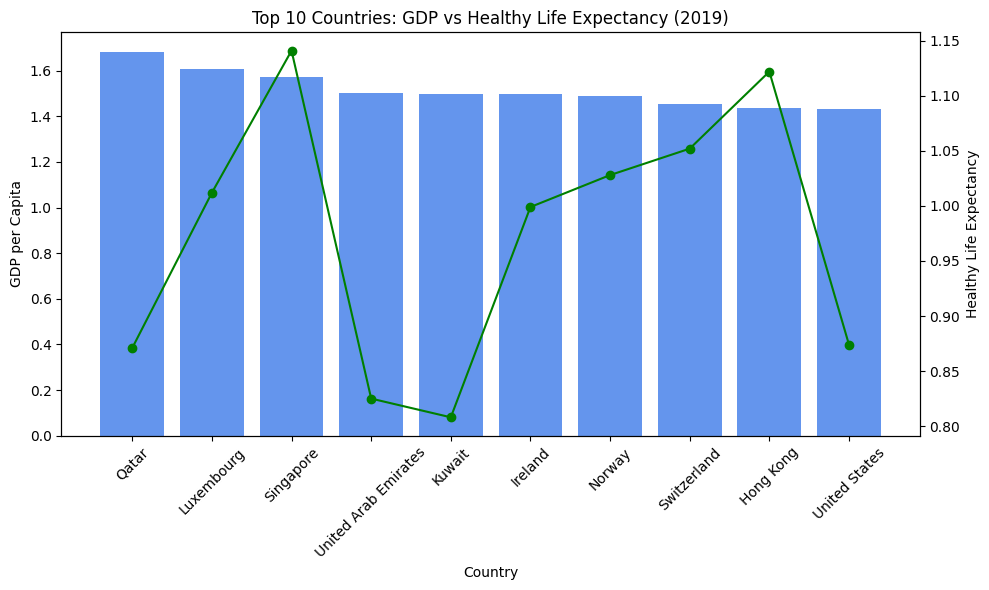

In [24]:
# Sort by GDP per capita and select top 10 countries
top10 = df_2019.sort_values('GDP per capita', ascending=False).head(10)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for GDP per capita
ax1.bar(top10['Country or region'], top10['GDP per capita'], color='cornflowerblue', label='GDP per Capita')
ax1.set_ylabel('GDP per Capita')
ax1.set_xlabel('Country')
ax1.tick_params(axis='x', rotation=45)

# Line plot for Healthy Life Expectancy
ax2 = ax1.twinx()
ax2.plot(top10['Country or region'], top10['Healthy life expectancy'], color='green', marker='o', label='Healthy Life Expectancy')
ax2.set_ylabel('Healthy Life Expectancy')

# Title and layout
plt.title('Top 10 Countries: GDP vs Healthy Life Expectancy (2019)')
fig.tight_layout()
plt.show()

